In [482]:
import sklearn
import numpy as np
import numpy.random as rnd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def plot_generated_data(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()
    
def plot_gradient_descent(theta, eta, theta_path=None):
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
def plot_stochastic_gradient_descent(X, y):
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

    m = len(X_b)
    n_epochs = 50
    
    theta = np.random.randn(2,1)  # random initialization

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:                    # not shown in the book
                y_predict = X_new_b.dot(theta)           # not shown
                style = "b-" if i > 0 else "r--"         # not shown
                plt.plot(X_new, y_predict, style)        # not shown
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

    plt.plot(X, y, "b.")                                 # not shown
    plt.xlabel("$x_1$", fontsize=18)                     # not shown
    plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
    plt.axis([0, 2, 0, 15])                              # not shown
    plt.show()                                           # not shown
    
    
def plot_logistic(_new, y_proba):
    decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

    plt.figure(figsize=(8, 3))
    plt.plot(X[y==0], y[y==0], "bs")
    plt.plot(X[y==1], y[y==1], "g^")
    plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
    plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
    plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
    plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
    plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
    plt.xlabel("Petal width (cm)", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([0, 3, -0.02, 1.02])
    plt.show()

# 연습문제

## 문제 1,2 데이터 준비사항
* np.random.seed(42)
* X = 5 * np.random.rand(100,1)
* y = 20 + 9 * X + np.random.rand(100,1) * 3
* X_b = np.c_[np.ones((100,1),X]
* theta = np.random.randn(2,1)

## Question 1
Build a batch gradient descent with number of iterations = 100. What is the theta value if learning rate(e.g., eta) is set to 0.1 and 0.01?
* Ans ;
 * eta = 0.1, theta = [[21.45978618], [ 9.00541536]]
 * eta = 0.01, theta = [[11.70760718], [12.0794235 ]]
 

### 1. 데이터 준비

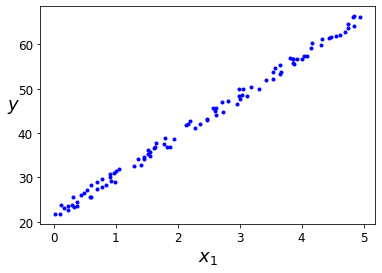

In [483]:
np.random.seed(42)
𝑋 = 5 * np.random.rand(100,1)
y = 20 + 9*𝑋 +np.random.rand(100,1)*3
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta = np.random.randn(2, 1)
plot_generated_data(X, y)

### 1.1 eta = 0.1일때, theta = [[21.45978618], [ 9.00541536]] 이니 정답을 도출할 수 있게 코드를 작성하시오.

In [484]:
eta = 0.1 # learning rate
n_iterations = 100
m = 86.533

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[21.4597236 ]
 [ 8.84314567]]


### 1.2  eta = 0.01일때, theta = [[11.70760718], [12.0794235 ]] 이니 정답을 도출할 수 있게 코드를 작성하시오.

In [485]:
eta = 0.01 # learning rate
n_iterations = 100
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[12.34409869]
 [11.87879346]]


## Question 2
Build a mini-batch gradient descent.
* nuber or iterations = 50
* initial learning rate eta = 0.1 
* the learning rate reduce by half after every 10 epochs trained.
* Find theta.

**< Tip >**

creat a learning_schedule function takes initial eta and current epochs as inputs.
 * n = epochs//10
 * eta = initial eta * 2 ^ (-n)
 
정답 : theta = [[21.45560249], [ 9.00669781]] 이니 정답을 도출할 수 있게 코드를 작성하시오.

In [486]:
n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2, 1) # random initialization

t0,t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

print(theta)

[[16.56261222]
 [10.57190381]]


## Question 3
Build a Logistic regression model to reconize Iris-Versicolor with following requirements
* Use 2 features >> sepal width, petal length
* Randomly split Iris data into training - test sets with ratio 8:2 using train_test_split with random_state = 10.
* Report the accuracies of model on training and test set.

**< Tip >**

model.score(data,target) 을 사용해 정확도를 구하시오.

정답 : 학습 정확도는 0.7167이고 Test 정확도는 0.7333입니다.

### 1. 데이터 로드
### 1.1) Iris 데이터 로드

In [487]:
from sklearn.datasets import load_iris
iris = load_iris()

### 1.2) x와 y값 설정.

In [488]:
X = iris["data"][:, 3:] # extract data contain only petal width
y = (iris["target"] == 2).astype(np.int) # target = 1 if Iris-Virginica, else 0

<ipython-input-488-fa96070d18da>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # target = 1 if Iris-Virginica, else 0


### 1.3) Train과 Test 데이터 구별
* train_test_split(feature, target, test_size, random_state)를 사용해서 학습과 테스트 데이터셋을 구별합니다.

In [489]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### 2. 모델 빌드
### 2.1) LogisticRegression모델 빌드

In [490]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### 2.2) LogisticRegression 훈련

In [491]:
log_reg.fit(X, y)

LogisticRegression()

### 3. 성능 평가
### 3.1) 학습 데이터로 스코어 평가(정확도)
* 학습 정확도는 0.7167이다.

In [492]:
train_accuracy_score = log_reg.score(X_train, y_train)
print(train_accuracy_score)

0.95


### 3.2) 테스트 데이터로 스코어 평가(정확도)
* Test 정확도는 0.7333이다.

In [493]:
test_accuracy_score = log_reg.score(X_test, y_test)
print(test_accuracy_score)

1.0
